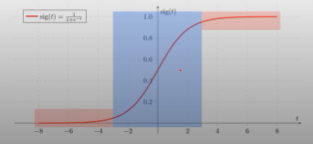

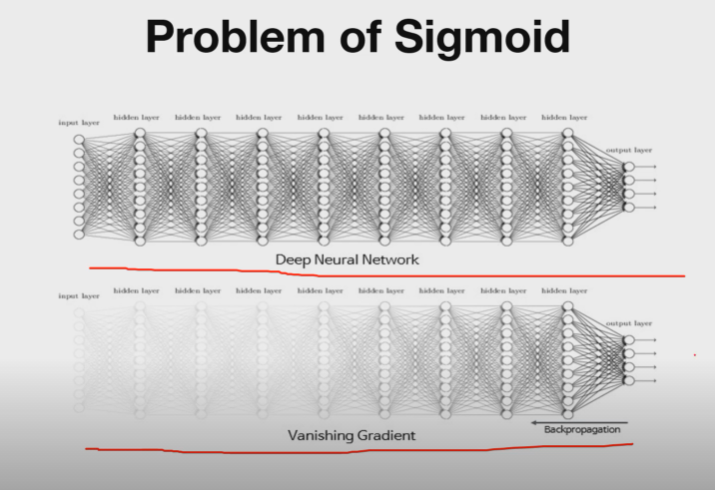

In [1]:
import torch

# ReLU (렐루)

f(x)=max(0,x)
음수인 경우 0으로 출력 , 양수인 경우 자기 자신을 출력

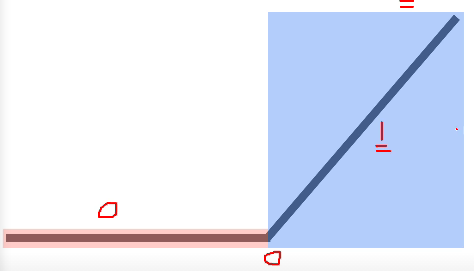

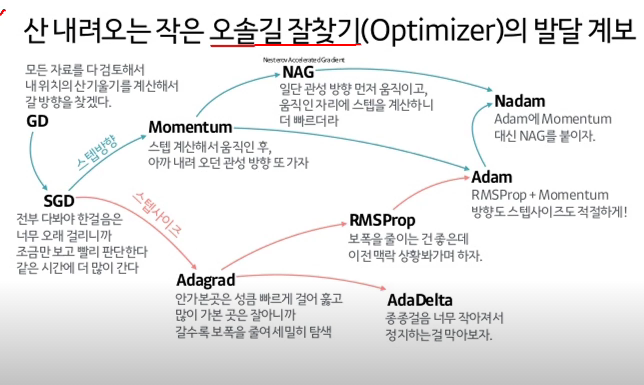

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

C:\ProgramData\Miniconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [14]:
# MNIST data image of shape 28*28 =784
linear = torch.nn.Linear(784,10,bias = True).to(device)

torch.nn.init.normal_(linear.weight)



Parameter containing:
tensor([[ 0.9181, -0.1792,  0.7529,  ...,  1.6053, -0.6364, -1.8495],
        [ 0.8919,  0.3276,  2.1680,  ..., -0.0417,  0.1573, -1.2870],
        [-0.7842, -0.8394, -0.5225,  ...,  1.6680, -1.3716, -0.4603],
        ...,
        [ 0.0866, -1.7133, -0.1283,  ...,  0.6860, -0.1274, -0.5993],
        [ 0.6464, -1.0089, -1.2587,  ...,  1.0357,  0.3283, -0.8767],
        [-1.2286,  1.2336,  0.7931,  ..., -1.4972, -0.4711,  0.4717]],
       requires_grad=True)

In [8]:
criterion = torch.nn.CrossEntropyLoss().to(device) #criterion = 표준, Softmax internally computed.
optimizer = torch.optim.Adam(linear.parameters(),lr=learning_rate) 
# NO SGD -> 저자가 말하는 Adam method의 의 주요 장점은
#stepsize가 gradient의 rescaling에 영향 받지 않는다는 것이다. gradient가 커져도 stepsize는 bound되어 있어서 어떠한 
#objective function을 사용한다 하더라도 안정적으로 최적화를 위한 하강이 가능하다.

total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost =0 
    total_batch = len(data_loader)
        
    for X,Y in data_loader:
        # reshpep input image into batch_size by 784
        # Label is not one-hot encoded
            
        X = X.view(-1,28*28).to(device)
        Y = Y.to(device) # Y = Y.to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis,Y)
        cost.backward()
        optimizer.step() # optimizer.step()

        avg_cost += cost / total_batch
            
    print("Epoch ", "%04d"% (epoch+1),"cost = ","{:.9f}".format(avg_cost))

Epoch  0001 cost =  5.728240490
Epoch  0002 cost =  1.562848449
Epoch  0003 cost =  1.036820889
Epoch  0004 cost =  0.828017235
Epoch  0005 cost =  0.710269213
Epoch  0006 cost =  0.633605897
Epoch  0007 cost =  0.577520072
Epoch  0008 cost =  0.535485566
Epoch  0009 cost =  0.502551138
Epoch  0010 cost =  0.476104528
Epoch  0011 cost =  0.453757524
Epoch  0012 cost =  0.435718417
Epoch  0013 cost =  0.420195490
Epoch  0014 cost =  0.406821012
Epoch  0015 cost =  0.394985646
